<a href="https://www.kaggle.com/code/srustidongre/exploratory-data-analysis-using-python?scriptVersionId=97796279" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
inp0=pd.read_csv("../input/bank-marketing-data-set/bank_marketing_updated_v1.csv")
inp0.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


# DATA CLEANING

In [3]:
inp0=pd.read_csv("../input/bank-marketing-data-set/bank_marketing_updated_v1.csv",skiprows=2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
#dropiing the customer_id
inp0.drop("customerid", axis=1, inplace=True) #it can run only once, next time it will throw error as the coumn is removed
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
#spliting jobeduand creating a new column job
inp0['job']=inp0.jobedu.apply(lambda x: x.split(",")[0]) # 0 for first element of splited text
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [6]:
#spliting jobeduand creating a new column education
inp0['Education']=inp0.jobedu.apply(lambda x: x.split(",")[1]) # 1 for secondelement of splited text
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,Education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [7]:
#dropping the jobedu column
inp0.drop('jobedu',axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,Education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [8]:
inp0[inp0.month.apply(lambda x : isinstance(x,float))==True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,Education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


In [9]:
#error was due to missing values 
#checking for missing values
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
Education     0
dtype: int64

In [10]:
inp0.age.isnull().sum()

20

In [11]:
inp0.shape

(45211, 19)

In [12]:
#finding percentage of missing values
100*20/45211

0.04423702196368141

In [13]:
#0.04 percent of age is a very small number and the age is not that imp variable or domain here so we can drop it
#dropping the missing values
inp1= inp0[~inp0.age.isnull()].copy()

In [14]:
inp1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
Education     0
dtype: int64

In [15]:
#handle months mising value
inp1.month.isnull().sum() #50

50

In [16]:
inp1.month.value_counts(normalize = True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [17]:
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

In [18]:
inp1.month.fillna(month_mode,inplace=True)

In [19]:
inp1.month.isnull().sum()

0

In [20]:
inp1.month.value_counts(normalize = True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [21]:
inp1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
Education     0
dtype: int64

In [22]:
#univaritae analysis
inp1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [23]:
### In this case -1 indicates missing value because the person has not been contacted

In [24]:
inp1.loc[inp1.pdays<0,'pdays']= np.NaN
inp1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [25]:
inp1.response.isnull().sum()

30

In [26]:
100*30/45211 #percentage

0.06635553294552211

In [27]:
inp2=inp1[~inp1.response.isnull()].copy()
inp2.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,Education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


In [28]:
inp2.response.isnull().sum()

0

# Outlier Handling

In [29]:
#Age Variable
inp1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

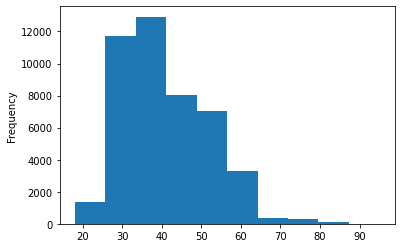

In [30]:
inp1.age.plot.hist()

<AxesSubplot:>

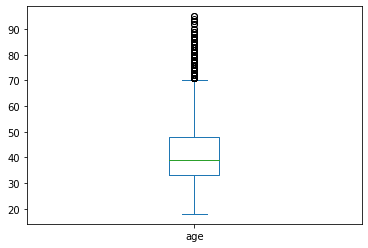

In [31]:
inp1.age.plot.box()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


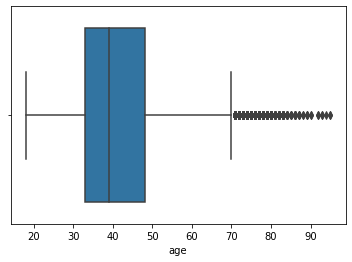

In [32]:
sns.boxplot(inp1.age)
plt.show()

# Balance Variables

In [33]:
inp1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

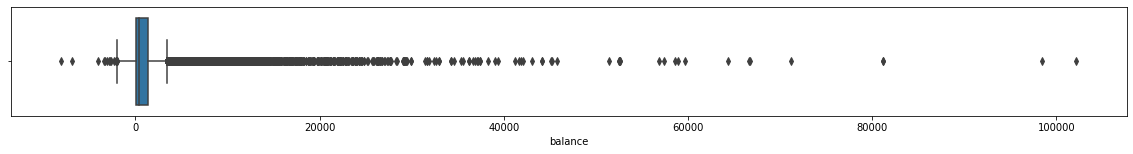

In [34]:
plt.figure(figsize=[20,2])
sns.boxplot(inp1.balance)
plt.show

In [35]:
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [36]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


In [37]:
#instead of looking at the mean values we can look at th epercentiles

In [38]:
inp1.salary.quantile([0.75])#graded question
inp1.salary.mean()

57005.974640968336

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

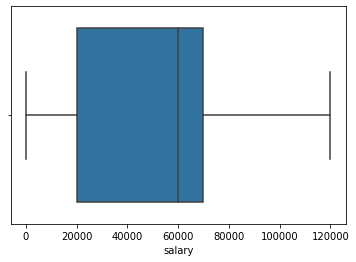

In [39]:
sns.boxplot(inp1.salary)
plt.show

# Standardizig the Variables

In [40]:
inp1.duration

0                     261 sec
1                     151 sec
2                      76 sec
3                      92 sec
4                     198 sec
                 ...         
45206    16.2833333333333 min
45207                 7.6 min
45208    18.7833333333333 min
45209    8.46666666666667 min
45210    6.01666666666667 min
Name: duration, Length: 45191, dtype: object

In [41]:
inp1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [42]:
inp1.duration = inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [43]:
inp1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

# Univariate Data Analysis

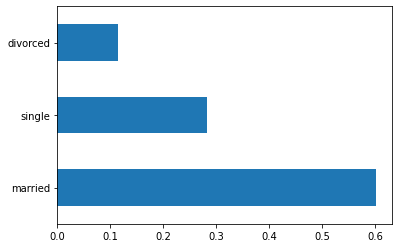

In [44]:
inp1.marital.value_counts(normalize= True).plot.barh()
plt.show()

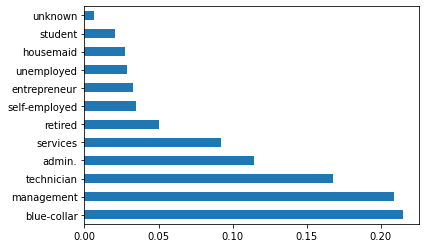

In [45]:
inp1.job.value_counts(normalize= True).plot.barh()
plt.show()

In [46]:
inp1.Education.value_counts(normalize= True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: Education, dtype: float64

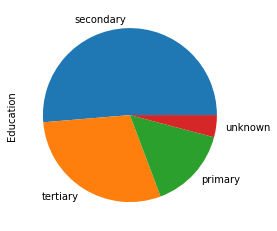

In [47]:
inp1.Education.value_counts(normalize= True).plot.pie()
plt.show()

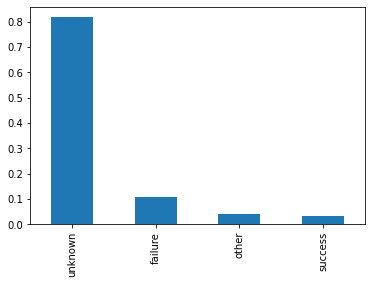

In [48]:
#poutcome
inp1.poutcome.value_counts(normalize= True).plot.bar()
plt.show()

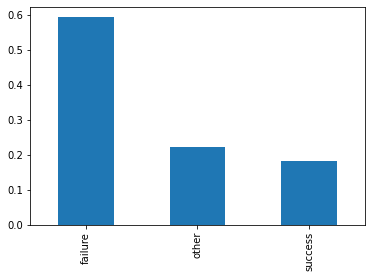

In [49]:
#without unknown
inp1[~(inp1.poutcome=="unknown")].poutcome.value_counts(normalize= True).plot.bar()
plt.show()

In [50]:
#response variable
inp1.response.value_counts(normalize = True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

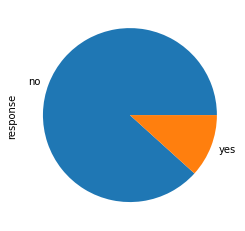

In [51]:
inp1.response.value_counts(normalize = True).plot.pie()
plt.show()

# Bivariate Analysis

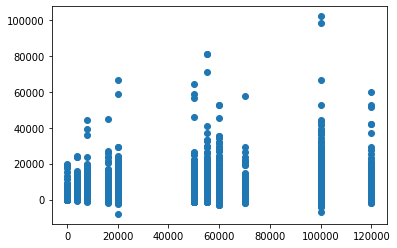

In [52]:
plt.scatter(inp1.salary,inp1.balance)

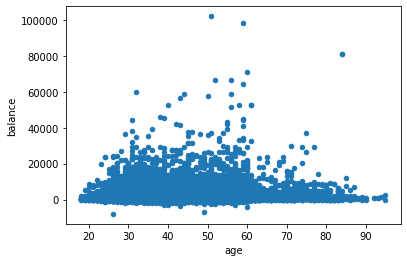

In [53]:
inp1.plot.scatter(x="age",y="balance")
plt.show()

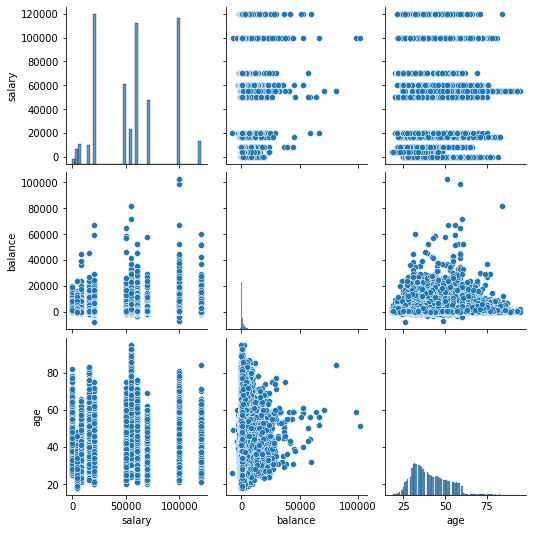

In [54]:
sns.pairplot(data=inp1,vars=["salary","balance","age"])
plt.show()

In [55]:
#Quantifying using correlation
inp1[["salary","balance","age"]].corr()

,salary,balance,age
salary,1.000000,0.055505,0.024374
balance,0.055505,1.000000,0.097755
age,0.024374,0.097755,1.000000


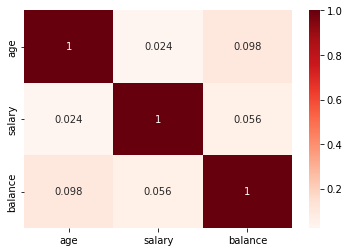

In [56]:
#correaltion heatmap
sns.heatmap(inp1[["age","salary","balance"]].corr(),annot=True,cmap="Reds")
plt.show()

# categorical to numeric


In [57]:
inp1.groupby("response")["salary"].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [58]:
inp1.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

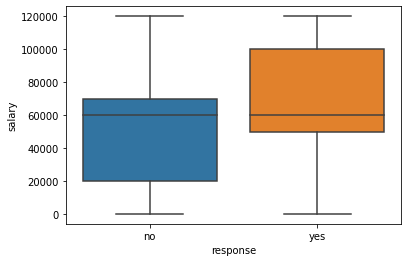

In [59]:
sns.boxplot(data=inp1,y="salary", x="response")
plt.show()


# response vs balance
- we know that balance is highly skewed [tip : use - for getting bullet points]

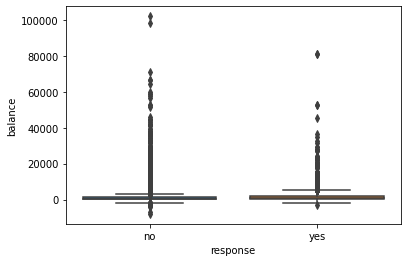

In [60]:
sns.boxplot(data=inp1,y="balance", x="response")
plt.show()

In [61]:
inp1.groupby("response")["balance"].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [62]:
inp1.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

In [63]:
def p75(x):
    return np.quantile(x,0.75)

In [64]:
inp1.groupby("response")["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


<AxesSubplot:xlabel='response'>

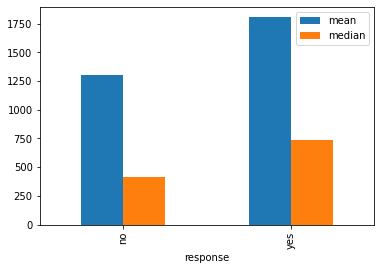

In [65]:
inp1.groupby("response")["balance"].aggregate(["mean","median"]).plot.bar()

<AxesSubplot:xlabel='Education'>

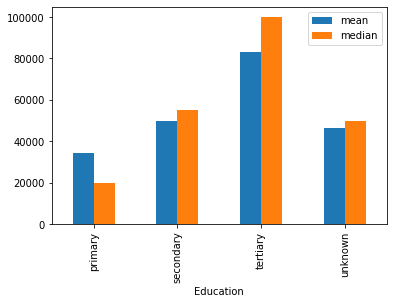

In [66]:
inp1.groupby("Education")["salary"].aggregate(["mean","median"]).plot.bar()

In [67]:
inp1.groupby("job")["salary"].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

#  Categorical to Categorical

In [68]:
inp1["response_flag"]=np.where(inp1.response=="yes",1,0)
inp1["response_flag"].head()

0    0
1    0
2    0
3    0
4    0
Name: response_flag, dtype: int64

In [69]:
inp1.response_flag.value_counts()

0    39906
1     5285
Name: response_flag, dtype: int64

In [70]:
inp1.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [71]:
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [72]:
inp1.response_flag.mean()

0.11694806488017526

In [73]:
#education vs response rate f

In [74]:
inp1.groupby("Education")["response_flag"].mean()

Education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

In [75]:
inp1.groupby("marital")["response_flag"].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

<AxesSubplot:ylabel='marital'>

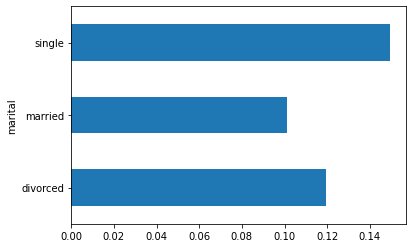

In [76]:
inp1.groupby("marital")["response_flag"].mean().plot.barh()

In [77]:
inp1.groupby("loan")["response_flag"].mean()

loan
no     0.126489
yes    0.066897
Name: response_flag, dtype: float64

<AxesSubplot:xlabel='loan'>

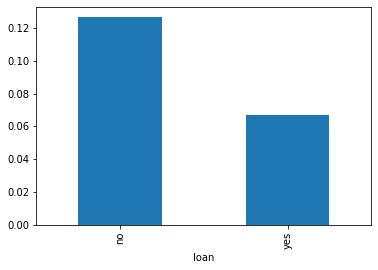

In [78]:
inp1.groupby("loan")["response_flag"].mean().plot.bar()

In [79]:
inp1.groupby("housing")["response_flag"].mean()

housing
no     0.166982
yes    0.076960
Name: response_flag, dtype: float64

<AxesSubplot:xlabel='housing'>

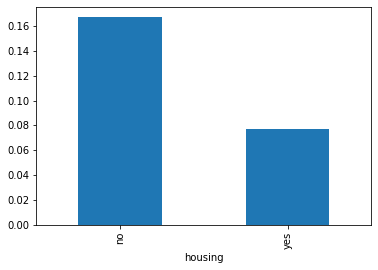

In [80]:
inp1.groupby("housing")["response_flag"].mean().plot.bar()

In [81]:
### Age Vs rsponse

<AxesSubplot:xlabel='response', ylabel='age'>

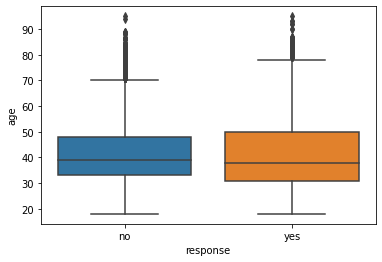

In [82]:
sns.boxplot(data=inp1,x="response",y="age")

<AxesSubplot:xlabel='age', ylabel='response'>

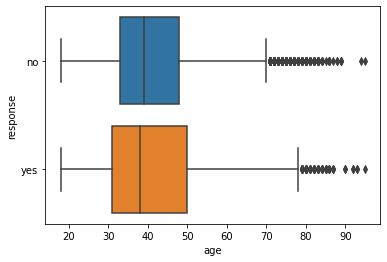

In [83]:
sns.boxplot(data=inp1,x="age",y="response") # IF we alter the x and y

### Making Buckets of the age

In [84]:
?pd.cut

In [85]:
pd.cut(inp1.age[:5],[0,30,40,50,60,999],labels=["<30","30-40","40-50","50-60","60+"])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [86]:
inp1.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [87]:
inp1["age_bucket"]=pd.cut(inp1.age,[0,30,40,50,60,999],labels=["<30","30-40","40-50","50-60","60+"])
inp1["age_bucket"]

0        50-60
1        40-50
2        30-40
3        40-50
4        30-40
         ...  
45206    50-60
45207      60+
45208      60+
45209    50-60
45210    30-40
Name: age_bucket, Length: 45191, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [88]:
inp1.age_bucket.value_counts(normalize=True)

30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: age_bucket, dtype: float64

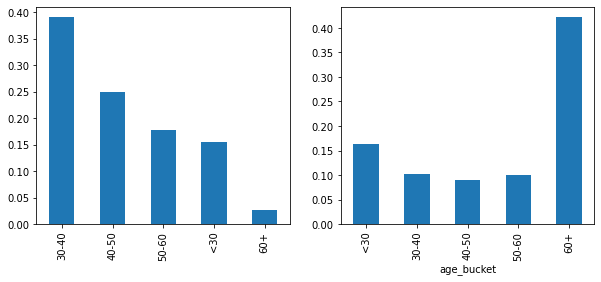

In [89]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_bucket.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby("age_bucket")["response_flag"].mean().plot.bar()
plt.show()

<AxesSubplot:ylabel='job'>

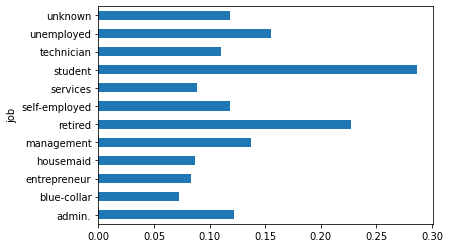

In [90]:
inp1.groupby("job")["response_flag"].mean().plot.barh()

<AxesSubplot:ylabel='Education'>

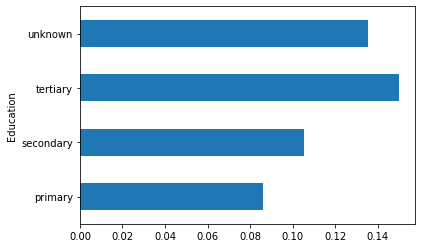

In [91]:
inp1.groupby("Education")["response_flag"].mean().plot.barh()

In [92]:
res = pd.pivot_table(data=inp1,index="Education",columns="marital",values="response_flag")
res

marital,divorced,married,single
Education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


<AxesSubplot:xlabel='marital', ylabel='Education'>

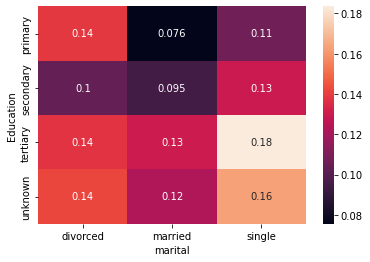

In [93]:
sns.heatmap(res,annot=True)

<AxesSubplot:xlabel='marital', ylabel='Education'>

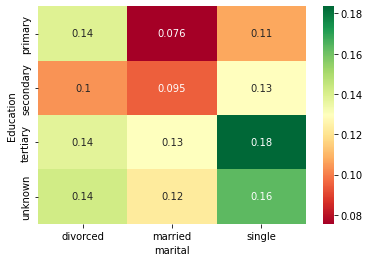

In [94]:
sns.heatmap(res,annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='marital', ylabel='Education'>

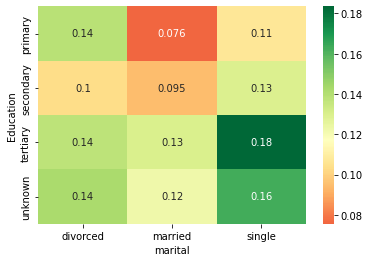

In [95]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)

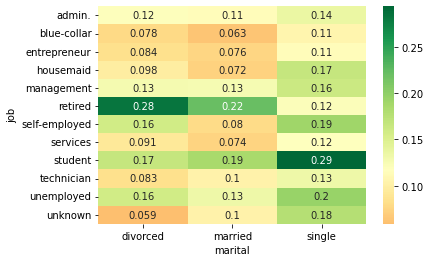

In [96]:
res1 = pd.pivot_table(data=inp1,index="job",columns="marital",values="response_flag")
sns.heatmap(res1,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

# So this was our EDA, i.e Exploratory data analysis. Please Upvote if you like it.